# Vectorized linear regression

In this notebook, we will go through how to implement linear regression in the vectorized approach using numpy, which is the recommended way to do it in python.

I strongly recommend spending about 10-15 minutes learning numpy before proceeding with this notebook. Moreover, it will be pretty important to know how to do matrix multiplication and taking the transpose of a matrix to implement the vectorized approaches.

In [ ]:
# importing required libraries

import numpy as np # linear algebra

import matplotlib.pyplot as plt # for plotting

## Vectorizing the hypothesis function
Let's say you are given a data set of house areas ($\text{km}^2$) in one column, and house prices (in \$100,000) in the other column. Your goal is to find a hypothesis function where the hypothesis given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x_1$$

Let's organize our inputs in a matrix $X$ with the following contents:
$$X = \begin{bmatrix}
 x_{0}\\
 x_{1}\\
 \vdots\\
 x_{m}\\
 \end{bmatrix}$$

 and a matrix y representing the expected target for each input
$$y = \begin{bmatrix}
 y_{0}\\
 y_{1}\\
 \vdots\\
 y_{m}\\
\end{bmatrix}$$

 and a matrix $\theta$ representing the parameters of our linear function
$$\theta = \begin{bmatrix}
 \theta_{0}\\
 \theta_{1}\\
\end{bmatrix}$$

How can we $h_\theta(x)$ as a single matrix operation? \\
First, for convenience, let's add a column of ones to the left of our input matrix $X$:
$$X = \begin{bmatrix}
 x^{(0)T}\\
 x^{(1)T}\\
 \vdots\\
 x^{(m)T}\\
\end{bmatrix}=\begin{bmatrix}
 1 & x_{0}\\
 1 & x_{1}\\
 \vdots & \vdots\\
 1 & x_{m}\\
\end{bmatrix}$$

In reality, $x^{(i)}= \begin{bmatrix} x^{i}_{0} \\ x^{i}_{1}\\ \end{bmatrix}$ but since we only have 1 input feature (house area) we can simply not worry about that (though this indexing notation will become very necessary when we move on to multi-feature linear regression). For now, let's not worry about that and simply present $x^{(i)}= \begin{bmatrix} 1 \\ x_{i}\\ \end{bmatrix}$ for simplicity. Note that by taking the [`transpose`](https://en.wikipedia.org/wiki/Transpose) of the matrix $x^{(i)}$ we get $x^{(i)T} =\begin{bmatrix} 1 & x_{i}\\ \end{bmatrix}$.


Then, if we take the matrix product between $X$ and $\theta$
$$X\theta = 
\begin{bmatrix}
 1 & x_{0}\\
 1 & x_{1}\\
 \vdots & \vdots\\
 1 & x_{m}\\
\end{bmatrix}
\begin{bmatrix}
 \theta_{0}\\
 \theta_{1}\\
\end{bmatrix} = 
\begin{bmatrix}
 \theta_0 + \theta_1x_{0}\\
 \theta_0 + \theta_1x_{1}\\
 \vdots \\
 \theta_0 + \theta_1x_{m}\\
\end{bmatrix} $$ 
Which represents a vector `(a matrix of size (1, m))` corresponding to the predicted value for each input. This was all done in a single operation! Also, you will need to know [`matrix multiplication`](https://www.mathsisfun.com/algebra/matrix-multiplying.html) in order to understand all previous steps.

The following may also be helpful.
By taking the [`transpose`](https://en.wikipedia.org/wiki/Transpose) of the matrix $\theta$ to get 

$$\theta^T = \begin{bmatrix}
 \theta_{0}
 & \theta_{1}
\end{bmatrix}$$

I'll leave it to the reader to verify that $h_\theta(x)=\theta_Tx$.

## Preparing the data
To make things simple, the data we will produce is somewhat random but follows a trend line.

In [ ]:
X = np.arange(10)
y = X + (np.random.random(10) * 2 - 1)

m = y.size  # number of training examples

# adding a column of ones to the left of X
X = np.stack([np.ones(m), X], axis=1)

# initializing theta
theta = np.zeros(2)

## Vectorized cost function
Using what we just put forward, try to implement a vectorized version of the cost function 
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

`Tip: in order to take the matrix multiplication between two numpy arrays A and B, we do the following: A @ B`

In [ ]:
def cost_function(theta, X, y):
  ''' 
  Compute cost for linear regression. Computes the cost of using theta as the
  parameter for linear regression to fit the data points in X and y.

  Parameters
  ----------
  theta is of shape (2,)
  X is of shape (m, 2)
  y is of shape (m,)
  
  Returns
  -------
  J, the value of the cost function
  '''
  m = y.size  # number of training examples
    
  # You need to return the following variables correctly
  J = 0
    
  # ====================== YOUR CODE HERE =====================

    
  # ===========================================================
  return J



In [ ]:
# test your function here
print(f"The current cost is: {cost_function(theta, X, y)}")

# Vectorized gradient descent

Recall that our goal is to minimize our cost function. The algorithsm we used for that is gradient descent, which is summarized as follows

$\text{Repeat until convergence}$ {
$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_{i}$$
}

Where with each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

`Tip: in order to take the transpose of a matrix A in numpy we do the following: A.T`

In [ ]:
m = y.shape[0]  # number of training examples
iterations = 2000
alpha = 1e-2 # learning rate

# Batch gradient descent
for i in range(iterations):
    # ==================== YOUR CODE HERE =================================


    # =====================================================================
        

## Plotting the results

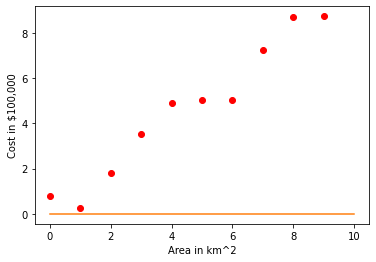

In [ ]:
# plotting the data points
plt.plot(X[:, 1:], y, "ro")
plt.xlabel("Area in km^2")
plt.ylabel("Cost in $100,000")

# plotting our line of best fit
x_axis = np.linspace(0, 10, 100)
x = np.stack([np.ones(x_axis.shape[0]), x_axis], axis=1)
plt.plot(x_axis, x @ theta)